In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Initialize the x- and y-arrays that we will use to plot
x_axis = []
mean = []
variance = []
skew_list = []
kurt_list = []

# generate gaussian pdf of x
mu = 2.0
variance = 2.0
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
#plot(x, stats.norm.pdf(x, mu, sigma))
#show()

In [3]:
# proposal
def q(x):
    # add a random number drawn from a gaussian whose mean is the current position and the standard deviation is 1
    # randn() draws from a normalized gausian whose mean is 0 and stdev is 1
    sigma = 0.3     # standard deviation, variance = sigma^2
    return x + sigma*randn()

In [4]:
# density function f(x)
def f(x):
    mu = 2
    sigma = math.sqrt(2)
    return 1.0/(sigma*math.sqrt(2.0*pi)) * exp(-0.5 * ((x-mu)/sigma)**2)

In [5]:
xs = [0]    # initialize MCMC algorithm with arbitrary starting value of x
for i in range(10000):
    x = xs[-1]
    x_new = q(x)
    accept_ratio = f(x_new)/f(x)
    if rand() < accept_ratio:
        xs.append(x_new)
    else:
        xs.append(x)

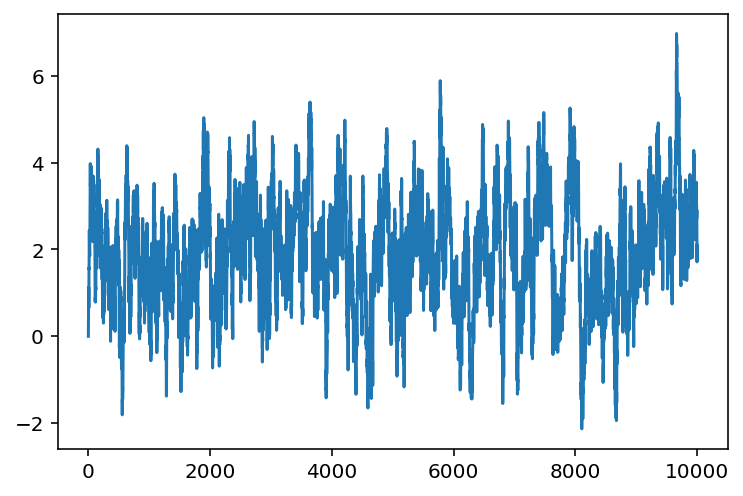

In [6]:
plot(xs)

(array([0.00351455, 0.01911038, 0.02965403, 0.05513454, 0.09291597,
        0.16298736, 0.22778691, 0.26139482, 0.29697966, 0.29961557,
        0.2495332 , 0.2056013 , 0.12564524, 0.08237232, 0.05118067,
        0.02284459, 0.00658979, 0.0010983 , 0.00197694, 0.00087864]),
 array([-2.13065267, -1.67544816, -1.22024364, -0.76503912, -0.3098346 ,
         0.14536991,  0.60057443,  1.05577895,  1.51098346,  1.96618798,
         2.4213925 ,  2.87659701,  3.33180153,  3.78700605,  4.24221056,
         4.69741508,  5.1526196 ,  5.60782412,  6.06302863,  6.51823315,
         6.97343767]),
 <a list of 20 Patch objects>)

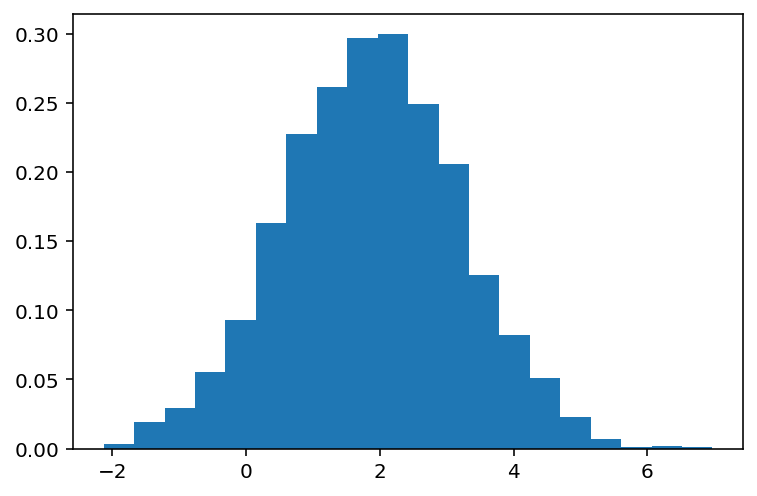

In [8]:
hist(xs, density=True, bins=20)

With a low variance for q(x'|x), the distribution becomes skewed left and more concentrated near the mean.
With a high variance for q(x'|x), the distribution becomes more "tailed".